# 02.PyTorch神经网络分类

In [116]:
'''

二元分类
    目标可以是两个选项之一,例如是或否
    eg. 根据某人的健康参数预测其是否患有心脏病。

多类分类
    目标可以是两个以上选项之一
    eg. 确定一张照片是食物、人还是狗。


多标签分类
    可以为目标分配多个选项
    eg. 预测应该为维基百科文章分配哪些类别(例如数学、科学和哲学）。


我们要介绍的内容

0. 分类神经网络的架构
    神经网络几乎可以有任何形状或大小,但它们通常遵循类似的平面图。

1. 准备好二分类数据
    数据几乎可以是任何东西,但首先我们将创建一个简单的二元分类数据集。

2. 构建PyTorch分类模型
    在这里,我们将创建一个模型来学习数据中的模式,我们还将选择损失函数、优化器并构建特定于分类的训练循环。

3. 将模型拟合到数据(训练）
    我们已经有了数据和模型,现在让我们让模型(尝试）在(训练）数据中查找模式。

4. 进行预测并评估模型(推理）
    我们的模型在数据中发现了模式,让我们将其发现与实际(测试）数据进行比较。

5. 改进模型(从模型角度）
    我们已经训练并评估了一个模型,但它不起作用,让我们尝试一些方法来改进它。

6. 非线性
    到目前为止,我们的模型只能模拟直线,那么非线性(非直线）线呢？

7. 复制非线性函数
    我们使用非线性函数来帮助对非线性数据进行建模,但它们是什么样子的呢？

8. 将所有内容与多类分类结合起来
    让我们将迄今为止为二元分类所做的一切与多类分类问题放在一起。

'''

'\n\n二元分类\n    目标可以是两个选项之一,例如是或否\n    eg. 根据某人的健康参数预测其是否患有心脏病。\n\n多类分类\n    目标可以是两个以上选项之一\n    eg. 确定一张照片是食物、人还是狗。\n\n\n多标签分类\n    可以为目标分配多个选项\n    eg. 预测应该为维基百科文章分配哪些类别(例如数学、科学和哲学）。\n\n\n我们要介绍的内容\n\n0. 分类神经网络的架构\n    神经网络几乎可以有任何形状或大小,但它们通常遵循类似的平面图。\n\n1. 准备好二分类数据\n    数据几乎可以是任何东西,但首先我们将创建一个简单的二元分类数据集。\n\n2. 构建PyTorch分类模型\n    在这里,我们将创建一个模型来学习数据中的模式,我们还将选择损失函数、优化器并构建特定于分类的训练循环。\n\n3. 将模型拟合到数据(训练）\n    我们已经有了数据和模型,现在让我们让模型(尝试）在(训练）数据中查找模式。\n\n4. 进行预测并评估模型(推理）\n    我们的模型在数据中发现了模式,让我们将其发现与实际(测试）数据进行比较。\n\n5. 改进模型(从模型角度）\n    我们已经训练并评估了一个模型,但它不起作用,让我们尝试一些方法来改进它。\n\n6. 非线性\n    到目前为止,我们的模型只能模拟直线,那么非线性(非直线）线呢？\n\n7. 复制非线性函数\n    我们使用非线性函数来帮助对非线性数据进行建模,但它们是什么样子的呢？\n\n8. 将所有内容与多类分类结合起来\n    让我们将迄今为止为二元分类所做的一切与多类分类问题放在一起。\n\n'

In [117]:
'''
0. 分类神经网络的架构

输入层形状
    与特征数量相同(例如,心脏病预测中的年龄、性别、身高、体重、吸烟状况为 5)

隐藏层
    特定于问题,最小值 = 1, 最大值 = 无限制


每个隐藏层的神经元
    具体问题,一般为 10 到 512

输出层形状 ( out_features )
    1 (一类或另一类)


隐藏层激活
    通常是ReLU (修正线性单元）,但也可以是许多其他单元


输出激活
    Sigmoid (PyTorch 中的torch.sigmoid )

损失函数
    二元交叉熵 (PyTorch 中的torch.nn.BCELoss )

优化器
    SGD (随机梯度下降）, Adam (有关更多选项, 请参阅torch.optim )



'''

'\n0. 分类神经网络的架构\n\n输入层形状\n    与特征数量相同(例如,心脏病预测中的年龄、性别、身高、体重、吸烟状况为 5)\n\n隐藏层\n    特定于问题,最小值 = 1, 最大值 = 无限制\n\n\n每个隐藏层的神经元\n    具体问题,一般为 10 到 512\n\n输出层形状 ( out_features )\n    1 (一类或另一类)\n\n\n隐藏层激活\n    通常是ReLU (修正线性单元）,但也可以是许多其他单元\n\n\n输出激活\n    Sigmoid (PyTorch 中的torch.sigmoid )\n\n损失函数\n    二元交叉熵 (PyTorch 中的torch.nn.BCELoss )\n\n优化器\n    SGD (随机梯度下降）, Adam (有关更多选项, 请参阅torch.optim )\n\n\n\n'

In [118]:
'''
1. 制作分类数据并准备好

我们将使用 Scikit-Learn 中的 make_circles() 方法生成两个具有不同颜色点的圆圈。


'''

from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")



First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [119]:
# 可视化

# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [120]:
# 每个类有多少个值？

# Check different labels
circles.label.value_counts()


label
1    500
0    500
Name: count, dtype: int64

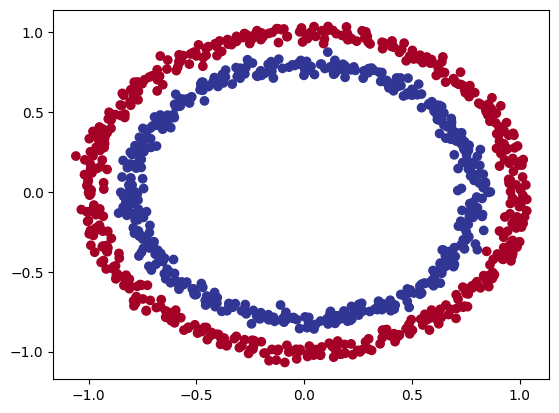

In [121]:
# 可视化
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [122]:

# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [123]:

# 这表明我们有两个输入,一个输出

# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [124]:

# 1.2 将数据转换为张量并创建训练和测试分割

'''
将我们的数据转换为张量(现在我们的数据位于 NumPy 数组中,而 PyTorch 更喜欢使用 PyTorch 张量）。

将我们的数据分为训练集和测试集(我们将在训练集上训练模型以学习X和y之间的模式,然后在测试数据集上评估这些学习到的模式）。

'''


import torch

# 读取 numpy，创建 tensor ，再转换为 float32 格式

X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float)

# 查看前五个数据

X[:5], y[:5]








(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [125]:
'''
现在我们的数据是张量格式,让我们将其分为训练集和测试集。
为此,我们使用 Scikit-Learn 中有用的函数train_test_split() 。

我们将使用test_size=0.2 (80% 训练,20% 测试）,
并且由于分割在数据中随机发生,因此我们使用random_state=42 ,以便分割是可重现的。
'''

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

print(X_train.shape)

print(y_train.shape)

len(X_train), len(X_test), len(y_train), len(y_test)

torch.Size([800, 2])
torch.Size([800])


(800, 200, 800, 200)

In [126]:
'''
好的！看起来我们现在有 800 个训练样本和 200 个测试样本。

第二步. 建立模型

1. 设置与设备无关的代码(因此我们的模型可以在 CPU 或 GPU 上运行(如果可用）。
2. 通过子类化 nn.Module 构建模型。
3. 定义损失函数和优化器。
4. 创建训练循环(这将在下一节中介绍）


'''

# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device



'cuda'

In [127]:
'''

我们需要一个能够处理X数据作为输入并生成y数据形式的模型作为输出的模型。

换句话说, 给定X 特征 , 我们希望模型能够预测y (标签）。

这种具有特征和标签的设置称为监督学习。因为你的数据告诉你的模型在给定特定输入时应该输出什么。

让我们创建一个模型类：

1. 子类nn.Module (几乎所有 PyTorch 模型都是nn.Module的子类) 。
2. 在构造函数中创建 2 个 nn.Linear层, 能够处理X和y的输入和输出形状。
3. 定义一个包含模型前向传递计算的 forward()方法。
4. 实例化模型类并将其发送到目标 device

'''

# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [128]:
'''

唯一的重大变化是 self.layer_1 和 self.layer_2 之间发生的情况。
self.layer_1 采用 2 个输入特征 in_features=2 并生成 5 个输出特征 out_features=5 。

这被称为具有 5 个隐藏单元或神经元。
该层将输入数据从 2 个特征变成 5 个特征。
为什么要这样做？

这使得模型能够从 5 个数字(而不仅仅是 2 个数字）中学习模式,从而可能产生更好的输出。

我说可能是因为有时它不起作用。
您可以在神经网络层中使用的隐藏单元的数量是一个超参数(您可以自己设置的值）,并且没有必须使用的固定值。
一般来说,越多越好,但也有太多的情况。您选择的数量将取决于您正在使用的模型类型和数据集。


由于我们的数据集小且简单,因此我们将使其保持较小。
隐藏单元的唯一规则是下一层(在我们的例子中) self.layer_2 必须采用与上一层 out_features 相同的 in_features 。

这就是为什么self.layer_2有in_features=5 ,它从self.layer_1获取out_features=5并对它们执行线性计算,将它们变成out_features=1 (与y形状相同）。


您还可以使用nn.Sequential执行与上述相同的操作。


'''
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0



Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [129]:
'''
哇哦,这看起来比子类化nn.Module简单得多,为什么不总是使用nn.Sequential呢？

nn.Sequential对于直接计算来说非常棒,但是,正如命名空间所说,它总是按顺序运行。

因此,如果您想要发生其他事情(而不仅仅是直接的顺序计算）,您将需要定义自己的自定义nn.Module子类。

现在我们有了一个模型，让我们看看当我们通过它传递一些数据时会发生什么。

'''

# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")



Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0609],
        [-0.0117],
        [-0.2115],
        [-0.0182],
        [-0.2456],
        [-0.2153],
        [-0.0496],
        [-0.0973],
        [-0.2098],
        [-0.0087]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [130]:
'''
嗯，看起来预测的数量与测试标签的数量相同，但预测看起来与测试标签的形式或形状不同。

2.1 设置损失函数和优化器

不同的问题类型需要不同的损失函数。
例如，对于回归问题（预测数字），您可能会使用平均绝对误差 (MAE) 损失。
对于二元分类问题（例如我们的问题），您通常会使用二元交叉熵作为损失函数。

然而，相同的优化器函数通常可以在不同的问题空间中使用。

例如，随机梯度下降优化器（SGD、 torch.optim.SGD() ）可用于解决一系列问题，
这同样适用于 Adam 优化器（ torch.optim.Adam() ）。

随机梯度下降 (SGD) 优化器      分类、回归等等       torch.optim.SGD()
Adam Optimizer              分类、回归等等       torch.optim.Adam()
二元交叉熵损失                二元分类            torch.nn.BCELossWithLogits or torch.nn.BCELoss
交叉熵损失                    多类分类            torch.nn.CrossEntropyLoss
平均绝对误差 (MAE) 或 L1 损失  Regression 回归     torch.nn.L1Loss
均方误差 (MSE) 或 L2 损失     Regression 回归     torch.nn.MSELoss


PyTorch 有两种二元交叉熵实现：

torch.nn.BCELoss() 
    - 创建一个损失函数，用于测量目标（标签）和输入（特征）之间的二元交叉熵。

torch.nn.BCEWithLogitsLoss() 
    - 这与上面相同，只是它有一个内置的 sigmoid 层 ( nn.Sigmoid )（我们很快就会看到这意味着什么）。


应该使用哪一个？

torch.nn.BCEWithLogitsLoss()的文档指出，它比在 nn.Sigmoid 层之后使用 torch.nn.BCELoss() 更稳定。

所以一般来说，实现 2 是更好的选择。然而，对于高级用法，您可能希望将
nn.Sigmoid 和 torch.nn.BCELoss()的组合分开，但这超出了本笔记本的范围。
知道了这一点，让我们创建一个损失函数和一个优化器。

对于优化器，我们将使用torch.optim.SGD()以学习率 0.1 优化模型参数。

注意： PyTorch 论坛上有关于nn.BCELoss与nn.BCEWithLogitsLoss的使用的讨论。
一开始可能会令人困惑，但与许多事情一样，通过练习它会变得更容易。
''' 

# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)



In [131]:
'''
现在我们还创建一个评估指标。
评估指标可用于提供有关模型进展情况的另一个视角。
如果损失函数衡量模型的错误程度，我喜欢将评估指标视为衡量模型的正确程度。
当然，您可能会说这两者都在做同样的事情，但评估指标提供了不同的视角。


有几种评估指标可用于分类问题，但让我们从准确性开始。
'''
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


In [132]:
'''
训练模型

3.1 从原始模型输出到预测标签（logits -> 预测概率 -> 预测标签）

在训练循环步骤之前，让我们看看在前向传递过程中我们的模型会产生什么结果（前向传递由forward()方法定义）。

为此，我们向模型传递一些数据。

'''


# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits



tensor([[-0.0609],
        [-0.0117],
        [-0.2115],
        [-0.0182],
        [-0.2456]], device='cuda:0', grad_fn=<SliceBackward0>)

In [133]:

'''
然而，这些数字很难解释。

我们想要一些与我们的真实标签相当的数字。
为了将模型的原始输出（logits）转换为这种形式，我们可以使用sigmoid 激活函数。

'''

# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs



tensor([[0.4848],
        [0.4971],
        [0.4473],
        [0.4955],
        [0.4389]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [134]:
'''

为了改变预测标签中的预测概率，我们可以对 sigmoid 激活函数的输出进行舍入。

'''

# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [135]:
'''
3.2 构建训练和测试循环

好吧，我们已经讨论了如何获取原始模型输出并将其转换为预测标签，现在让我们构建一个训练循环。

我们首先训练 100 个 epoch，并每 10 个 epoch 输出模型的进度。

'''

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy

    # y_logits 是 input, y_train 是 target, 损失函数比较 input 和 target 之间的距离， BCEWithLogitsLoss 可以接受小数与整数比较距离
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. 清零梯度，防止梯度累加
    optimizer.zero_grad()

    # 4. 反向传播，计算每个 layer 中每个参数的梯度
    loss.backward()

    # 5. 根据计算到的梯度，以及之前设定的学习率，以及优化器的策略，更新 layer 中的参数
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69626, Accuracy: 49.50% | Test loss: 0.69953, Test acc: 48.50%
Epoch: 10 | Loss: 0.69400, Accuracy: 45.50% | Test loss: 0.69707, Test acc: 46.50%
Epoch: 20 | Loss: 0.69332, Accuracy: 48.88% | Test loss: 0.69617, Test acc: 45.00%
Epoch: 30 | Loss: 0.69311, Accuracy: 50.50% | Test loss: 0.69578, Test acc: 46.00%
Epoch: 40 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69557, Test acc: 45.50%
Epoch: 50 | Loss: 0.69302, Accuracy: 50.88% | Test loss: 0.69545, Test acc: 46.00%
Epoch: 60 | Loss: 0.69301, Accuracy: 51.75% | Test loss: 0.69535, Test acc: 46.50%
Epoch: 70 | Loss: 0.69300, Accuracy: 51.12% | Test loss: 0.69528, Test acc: 47.00%
Epoch: 80 | Loss: 0.69300, Accuracy: 50.88% | Test loss: 0.69522, Test acc: 47.00%
Epoch: 90 | Loss: 0.69300, Accuracy: 50.88% | Test loss: 0.69517, Test acc: 47.00%


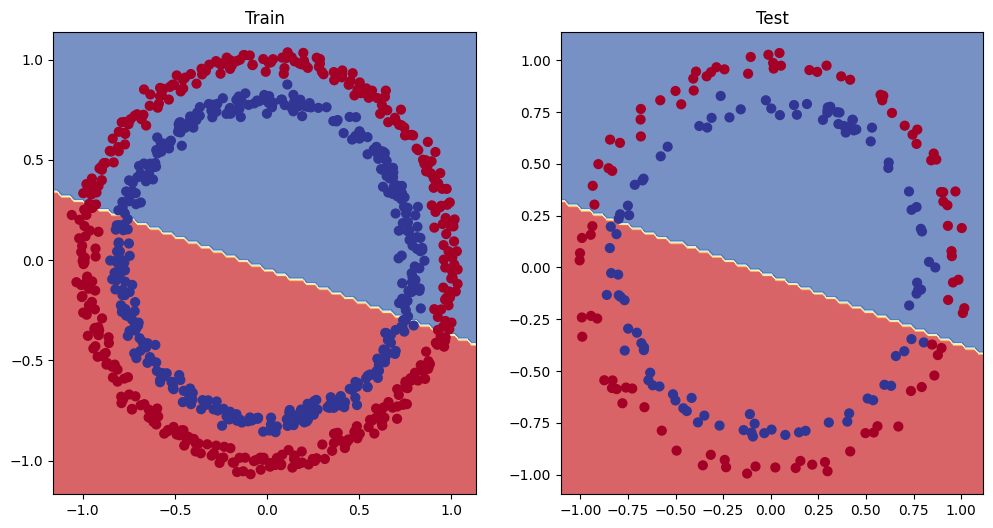

In [136]:
'''

看起来它很好地完成了训练和测试步骤，但结果似乎并没有太大变化。

每次数据分割的准确率几乎没有超过 50%。

而且因为我们正在处理平衡二元分类问题，这意味着我们的模型的性能与随机猜测一样好
（使用 0 类和 1 类的 500 个样本，模型每次预测 1 类的准确率将达到 50%）。


让我们画出模型的预测、它尝试预测的数据以及它为某物是 0 类还是 1 类而创建的决策边界。
为此，我们将编写一些代码来从Learn PyTorch for Deep Learning repo下载并导入helper_functions.py脚本。
它包含一个名为plot_decision_boundary()的有用函数，它创建一个NumPy网格来直观地绘制我们的模型预测某些类的不同点。

我们还将导入在笔记本 01 中编写的plot_predictions()以供稍后使用。

'''

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [137]:
'''
哇哦，看来我们已经找到了模型性能问题的原因了。
它目前正在尝试使用直线分割红点和蓝点......
这就解释了 50% 的准确率。由于我们的数据是圆形的，画一条直线最多只能将其从中间切掉。
用机器学习术语来说，我们的模型是欠拟合的，这意味着它没有从数据中学习预测模式。
我们如何改进这一点？

5. 改进模型（从模型角度）
让我们尝试解决模型的欠拟合问题。
特别关注模型（而不是数据），我们可以通过几种方法来做到这一点。

模型改进技术

添加更多层          每一层都可能增加模型的学习能力，每层都能够学习数据中的某种新模式，更多层通常被称为使神经网络更深。
添加更多隐藏单位     与上面类似，每层更多的隐藏单元意味着模型学习能力的潜在增加，更多的隐藏单元通常被称为使你的神经网络更宽。
训练更多 epoch      如果您的模型有更多机会查看数据，它可能会了解更多信息。
更改激活函数        有些数据不能只用直线拟合（就像我们所看到的那样），使用非线性激活函数可以帮助解决这个问题（提示，提示）。
改变学习率          模型特定性较少，但仍然相关，优化器的学习率决定模型每一步应改变其参数的程度，太多，模型会过度校正，太少，则学习不够。
改变损失函数        同样，虽然模型不太具体，但仍然很重要，不同的问题需要不同的损失函数。例如，二元交叉熵损失函数不适用于多类分类问题。
使用迁移学习        从与您的问题域类似的问题域中获取预训练模型，并将其调整为您自己的问题。我们在笔记本 06中介绍了迁移学习。


看看增加层效果如何

'''
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
# model_1

torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. 清零梯度
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    # 将模型设定为评估模式
    model_1.eval()

    # 推理模式，不计算梯度，相当于 torch.no_grad()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 200 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 300 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 400 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 500 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 600 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 700 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 800 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 900 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%


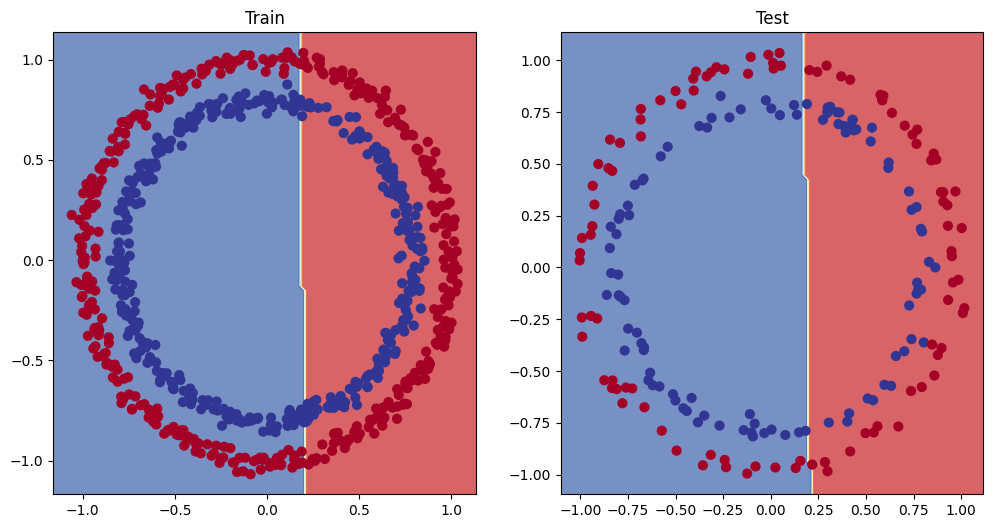

In [138]:
# 我们的模型训练时间更长，并且有一个额外的层，但看起来它仍然没有比随机猜测更好地学习任何模式。

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

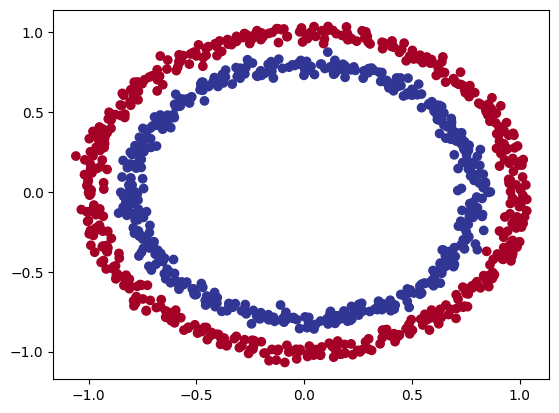

In [139]:
'''
6. 缺失的部分：非线性

我们已经看到我们的模型可以绘制直线，这要归功于它的线性层。
但是我们赋予它绘制非直线（非线性）线的能力怎么样？


首先，让我们重新创建数据以重新开始。我们将使用与之前相同的设置。


'''

# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [140]:

# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [37]:

'''
6.2 建立非线性模型

您认为可以用无限的直线（线性）和非直线（非线性）画出什么样的图案？
PyTorch 有一堆现成的非线性激活函数，它们可以做类似但不同的事情。
最常见和性能最好的之一是ReLU ）（整流线性单元， torch.nn.ReLU() ）。

与其谈论它，不如将其放入前向传播中隐藏层之间的神经网络中，看看会发生什么。


'''
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [38]:
'''
现在我们已经准备好了模型，让我们创建一个二元分类损失函数和一个优化器。

'''

# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


In [39]:

'''
6.4 评估用非线性激活函数训练的模型

还记得我们的圆数据是非线性的吗？好吧，让我们看看我们的模型预测现在看起来如何，该模型已经使用非线性激活函数进行了训练。

'''

# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

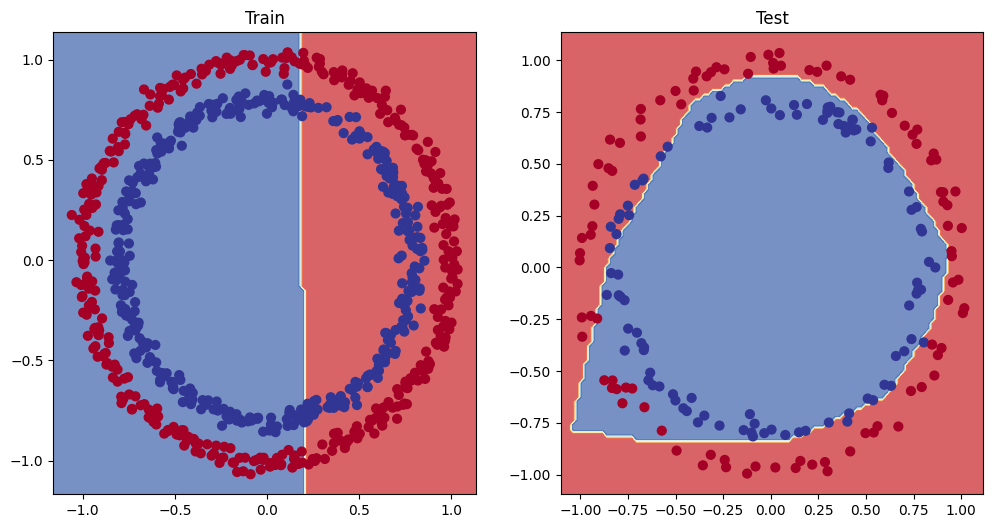

In [40]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [41]:


'''
7. 复制非线性激活函数

我们之前看到了如何向我们的模型添加非线性激活函数可以帮助它对非线性数据进行建模。

但非线性激活是什么样的呢？
我们复制一些以及它们的作用怎么样？
让我们从创建少量数据开始。

'''

# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

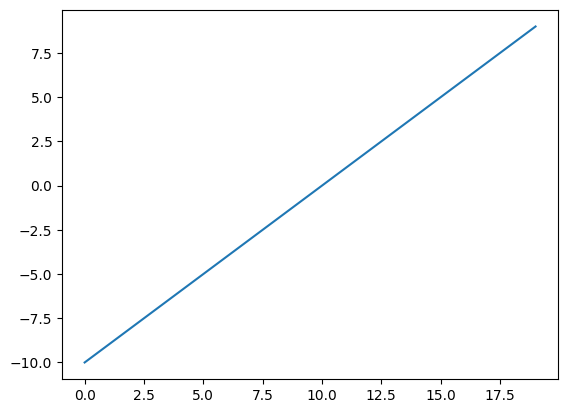

In [42]:
# Visualize the toy tensor
plt.plot(A);

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


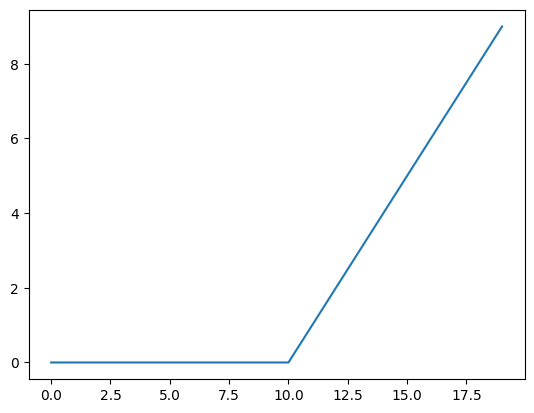

In [44]:

# Create ReLU function by hand 
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
print(relu(A))


# Plot ReLU activated toy tensor
plt.plot(relu(A));


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


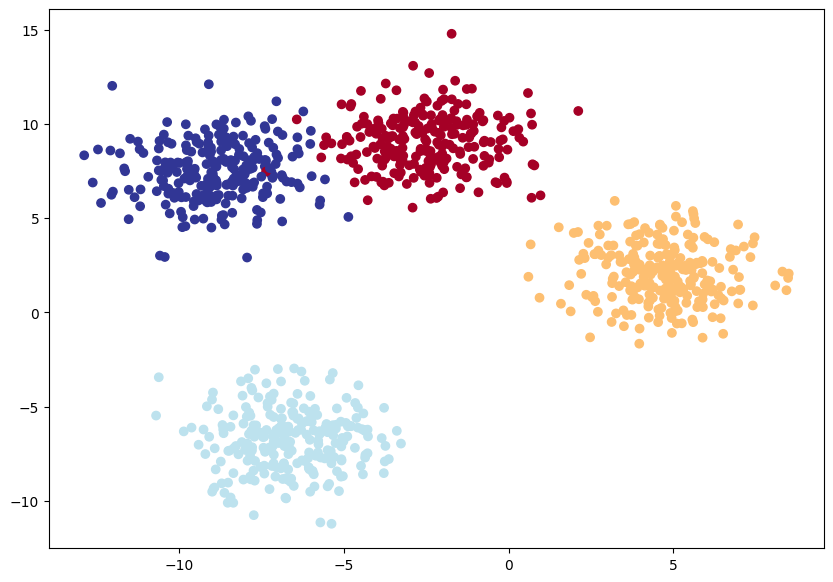

In [45]:
'''
8. 通过构建多类 PyTorch 模型将事物组合在一起

8.1 创建多类分类数据

为了开始多类分类问题，让我们创建一些多类数据。
为此，我们可以利用 Scikit-Learn 的 make_blobs()方法。

此方法将创建我们想要的任意多个类（使用centers参数）。


使用 make_blobs() 创建一些多类数据。
将数据转换为张量（ make_blobs()默认使用 NumPy 数组）。
使用train_test_split()将数据拆分为训练集和测试集。
可视化数据。

'''

# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)  # 64位整数
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [46]:
'''
好的！看起来我们已经准备好了一些多类数据。
让我们构建一个模型来分离彩色斑点。


8.2 在PyTorch中构建多类分类模型

我们构建一个类似于 model_3 但仍然能够处理多类数据的模型怎么样？
为此，我们创建一个nn.Module的子类，它接受三个超参数：

input_features - 进入模型的X特征的数量。

output_features - 我们想要的输出特征的理想数量（这相当于NUM_CLASSES或多类分类问题中的类数）。

hidden_units - 我们希望每个隐藏层使用的隐藏神经元的数量。



'''

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device



'cuda'

In [47]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [48]:
'''
8.3 为多类 PyTorch 模型创建损失函数和优化器

由于我们正在研究多类分类问题，因此我们将使用nn.CrossEntropyLoss()方法作为损失函数。

我们将坚持使用学习率为 0.1 的 SGD 来优化model_4参数。

'''

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here 
                                    # and seeing what happens to the model's performance

# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]



tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [49]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([4]), 4)

In [58]:
'''
我们的模型正在为我们拥有的每个类别预测一个值。


现在我们的模型正在输出 logits，但是如果我们想准确地找出提供样本的标签怎么办？
比如，我们如何从 logits -> prediction probabilities -> prediction labels 就像我们处理二元分类问题一样？

这就是softmax 激活函数发挥作用的地方。
softmax 函数计算每个预测类别与所有其他可能类别相比成为实际预测类别的概率。

'''

# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

print(f'y_logits size is {y_logits.shape}')

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

y_logits size is torch.Size([200, 4])
tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [59]:

'''
我们可以使用torch.argmax()检查哪个索引具有最高值。


'''

# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))



tensor([2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


In [60]:

'''
8.5 为多类 PyTorch 模型创建训练和测试循环


让我们训练epochs=100的模型，并每 10 个 epoch 对其进行评估。

'''

# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 0.03185, Acc: 99.12% | Test Loss: 0.02293, Test Acc: 99.50%
Epoch: 10 | Loss: 0.03093, Acc: 99.12% | Test Loss: 0.02186, Test Acc: 99.50%
Epoch: 20 | Loss: 0.03017, Acc: 99.12% | Test Loss: 0.02097, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02955, Acc: 99.12% | Test Loss: 0.02022, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02902, Acc: 99.12% | Test Loss: 0.01958, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02857, Acc: 99.12% | Test Loss: 0.01902, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02819, Acc: 99.12% | Test Loss: 0.01852, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02785, Acc: 99.12% | Test Loss: 0.01809, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02756, Acc: 99.12% | Test Loss: 0.01770, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02730, Acc: 99.12% | Test Loss: 0.01735, Test Acc: 99.50%


In [61]:
'''
8.6 使用 PyTorch 多类模型进行和评估预测

让我们做出一些预测并将其可视化。

'''

# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  5.4442,  13.0432, -17.8280, -11.7554],
        [  5.8881, -15.1900,   4.2523,  12.8025],
        [ -7.2237, -16.6245,  24.9488,  15.1842],
        [  2.3119,   9.5723, -10.3641,  -8.4612],
        [  9.9316,   4.0661, -17.2846,  -4.3220],
        [  6.5411, -18.8753,   6.2477,  15.9567],
        [ -7.6444, -12.6423,  22.3681,  11.7513],
        [  8.6298,  -1.0190, -11.2484,   0.2204],
        [ -7.3196, -23.2464,  30.4257,  20.9614],
        [  8.9504,   0.8413, -13.2247,  -1.4279]], device='cuda:0')

In [57]:
'''

好吧，看起来我们模型的预测仍然是 logit 形式。

尽管要评估它们，它们必须与我们的标签（ y_blob_test ）具有相同的形式，它们是整数形式。

让我们将模型的预测逻辑转换为预测概率（使用torch.softmax() ），
然后转换为预测标签（通过获取每个样本的argmax() ）。

注意：可以跳过torch.softmax()函数并直接从 
predicted logits -> predicted labels 通过直接在 logits 上调用torch.argmax() 。

例如， y_preds = torch.argmax(y_logits, dim=1) ，
这节省了计算步骤（没有torch.softmax() ），但导致没有可用的预测概率。

'''

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


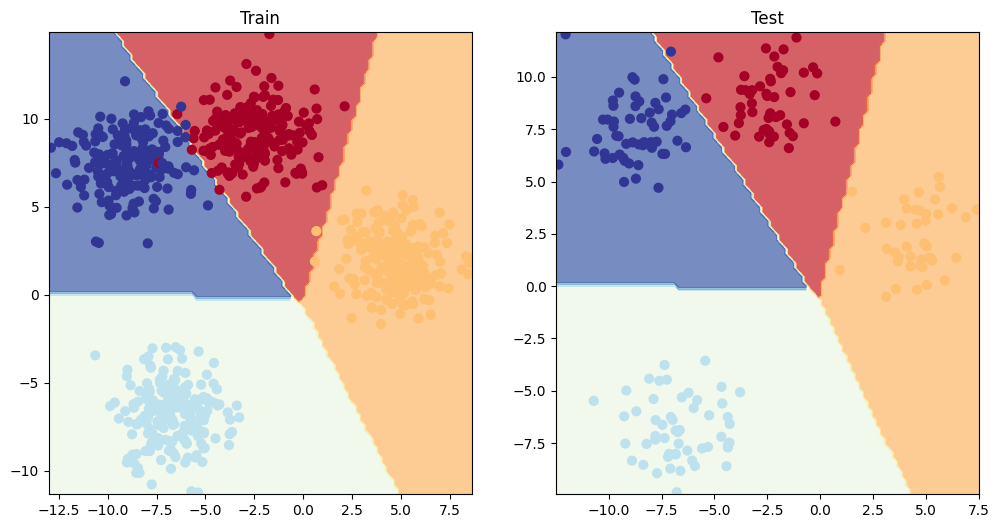

In [63]:
'''
让我们使用plot_decision_boundary()将它们可视化，记住因为我们的数据位于GPU上，
所以我们必须将其移动到CPU以便与matplotlib一起使用
（ plot_decision_boundary()会自动为我们执行此操作）。

'''
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


In [64]:


'''
9.更多分类评估指标

到目前为止，我们只介绍了评估分类模型的几种方法（准确性、损失和可视化预测）。


这些是您会遇到的一些最常见的方法，并且是一个很好的起点。

但是，您可能希望使用更多指标来评估您的分类模型，如下所示：

Accuracy 准确性     在 100 个预测中，您的模型有多少是正确的？例如，95% 的准确度意味着 95/100 的预测正确。
                    torchmetrics.Accuracy()
                    sklearn.metrics.accuracy_score()

Precision 精确      1000 个人中, 存在 20 个生病的人, 模型预测出 30 个人生病，精确度 20/30 66.7%
                    torchmetrics.Precision() 
                    sklearn.metrics.precision_score()


Recall 召回率       1000 个人中, 存在 20 个生病的人, 模型预测出 30 个人生病，召回率 20/20 100%
                    torchmetrics.Recall()
                    sklearn.metrics.recall_score()

                   1000 个人中, 存在 20 个生病的人, 模型预测出 10 个人生病，召回率 10/20  50% 


F1 score            将精确度和召回率合并为一个指标。 1 是最好的，0 是最差的。
                    torchmetrics.F1Score()
                    sklearn.metrics.f1_score()


Confusion matrix 混淆矩阵
                   以表格方式比较预测值与真实值，如果 100% 正确，则矩阵中的所有值将从左上到右下（诊断线）。
                   torchmetrics.ConfusionMatrix
                   sklearn.metrics.plot_confusion_matrix()

分类报告
                一些主要分类指标的集合，例如精度、召回率和 f1 分数。
                sklearn.metrics.classification_report()

                
Scikit-Learn（一个流行的世界级机器学习库）有许多上述指标的实现，
如果您正在寻找类似 PyTorch 的版本，请查看TorchMetrics ，尤其是TorchMetrics 分类部分。



让我们尝试一下torchmetrics.Accuracy指标。

'''


try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)


tensor(0.9950, device='cuda:0')

In [65]:
'''

Exercises 练习
All of the exercises are focused on practicing the code in the sections above.
所有练习都集中于练习上面各节中的代码。

You should be able to complete them by referencing each section or by following the resource(s) linked.
您应该能够通过参考每个部分或遵循链接的资源来完成它们。

All exercises should be completed using device-agonistic code.
所有练习都应使用设备竞争代码完成。

Resources: 资源：

Exercise template notebook for 02
02 练习模板笔记本
Example solutions notebook for 02 (try the exercises before looking at this)
02 的示例解决方案笔记本（在看此内容之前先尝试一下练习）
Make a binary classification dataset with Scikit-Learn's make_moons() function.
使用 Scikit-Learn 的make_moons()函数制作二元分类数据集。
For consistency, the dataset should have 1000 samples and a random_state=42.
为了保持一致性，数据集应有 1000 个样本和random_state=42 。
Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.
将数据转换为 PyTorch 张量。使用train_test_split将数据分为训练集和测试集，其中 80% 为训练，20% 为测试。
Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
通过子类化nn.Module来构建模型，该模型包含非线性激活函数，并且能够拟合您在 1 中创建的数据。
Feel free to use any combination of PyTorch layers (linear and non-linear) you want.
您可以随意使用您想要的 PyTorch 层（线性和非线性）的任意组合。
Setup a binary classification compatible loss function and optimizer to use when training the model.
设置二元分类兼容的损失函数和优化器以在训练模型时使用。
Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
创建训练和测试循环，使您在 2 中创建的模型适合您在 1 中创建的数据。
To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
要测量模型精度，您可以创建自己的精度函数或使用TorchMetrics中的精度函数。
Train the model for long enough for it to reach over 96% accuracy.
训练模型足够长的时间，使其达到超过 96% 的准确率。
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
训练循环应每 10 个时期输出模型训练和测试集损失和准确性的进度。
Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.
使用经过训练的模型进行预测，并使用在此笔记本中创建的plot_decision_boundary()函数绘制它们。
Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
在纯 PyTorch 中复制 Tanh（双曲正切）激活函数。
Feel free to reference the ML cheatsheet website for the formula.
请随意参考ML 备忘单网站以获取该公式。
Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
使用CS231n 中的螺旋数据创建功能创建多类数据集（代码见下文）。
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
构建能够拟合数据的模型（您可能需要线性和非线性层的组合）。
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
构建能够处理多类数据的损失函数和优化器（可选扩展：使用 Adam 优化器而不是 SGD，您可能需要尝试不同的学习率值才能使其正常工作）。
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
对多类数据进行训练和测试循环，并在其上训练模型以达到 95% 以上的测试精度（您可以在此处使用任何您喜欢的精度测量函数）。
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.
根据模型预测在螺旋数据集上绘制决策边界， plot_decision_boundary()函数也应该适用于该数据集。

'''

"\n\nExercises 练习\nAll of the exercises are focused on practicing the code in the sections above.\n所有练习都集中于练习上面各节中的代码。\n\nYou should be able to complete them by referencing each section or by following the resource(s) linked.\n您应该能够通过参考每个部分或遵循链接的资源来完成它们。\n\nAll exercises should be completed using device-agonistic code.\n所有练习都应使用设备竞争代码完成。\n\nResources: 资源：\n\nExercise template notebook for 02\n02 练习模板笔记本\nExample solutions notebook for 02 (try the exercises before looking at this)\n02 的示例解决方案笔记本（在看此内容之前先尝试一下练习）\nMake a binary classification dataset with Scikit-Learn's make_moons() function.\n使用 Scikit-Learn 的make_moons()函数制作二元分类数据集。\nFor consistency, the dataset should have 1000 samples and a random_state=42.\n为了保持一致性，数据集应有 1000 个样本和random_state=42 。\nTurn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.\n将数据转换为 PyTorch 张量。使用train_test_split将数据分为训练集和测试集，其中 80% 为训练，20% 为测试。\nBuild a model by subclassing nn

In [ ]:
'''

Extra-curriculum 课外活动
Write down 3 problems where you think machine classification could be useful (these can be anything, get creative as you like, for example, classifying credit card transactions as fraud or not fraud based on the purchase amount and purchase location features).
写下 3 个您认为机器分类可能有用的问题（可以是任何问题，只要您喜欢就可以发挥创意，例如，根据购买金额和购买位置特征将信用卡交易分类为欺诈或非欺诈）。
Research the concept of "momentum" in gradient-based optimizers (like SGD or Adam), what does it mean?
研究基于梯度的优化器（如 SGD 或 Adam）中“动量”的概念，它是什么意思？
Spend 10-minutes reading the Wikipedia page for different activation functions, how many of these can you line up with PyTorch's activation functions?
花 10 分钟阅读Wikipedia 页面了解不同的激活函数，您能将其中的多少个与PyTorch 的激活函数对应起来？
Research when accuracy might be a poor metric to use (hint: read "Beyond Accuracy" by by Will Koehrsen for ideas).
研究何时准确性可能是一个不好的衡量标准（提示：阅读Will Koehrsen 的“超越准确性”以获得想法）。
Watch: For an idea of what's happening within our neural networks and what they're doing to learn, watch MIT's Introduction to Deep Learning video.
观看：要了解我们的神经网络中发生的情况以及它们正在做什么学习，请观看麻省理工学院的深度学习简介视频。

'''